В данном ноутбуке в качестве домашнего задания я буду решать задачу классификации, данные по которой представлены на сайте Kaggle по ссылке https://www.kaggle.com/sid321axn/thoraric-surgery

В этой задаче необходимо определить, какой диагноз будет поставлен пациенту. Всего в наборе данных 8 классов - то есть 8 возможных диагнозов. Полное описание датасета можно найти на сайте по вышеуказанной ссылке.

##Подключение библиотек

Начнём с импорта необходимых для работы библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

##Загрузка данных

Загружаем наш датасет. Я поместил его в репозиторий Github, и использую pandas для чтения файла по ссылке

In [2]:
Raw_dataset = pd.read_csv("https://github.com/PonchaCape/DS-school-homework/raw/main/Big%20HW%202/ThoraricSurgery.csv")

Вывожу таблицу, взглянем на данные.

In [3]:
Raw_dataset.head()


,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


##Анализ и очистка данных

Видим множество зашифрованных столбцов. По этим данным есть описание данных на английском языке.
1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)
2. PRE4: Forced vital capacity - FVC (numeric)
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
5. PRE7: Pain before surgery (T,F)
6. PRE8: Haemoptysis before surgery (T,F)
7. PRE9: Dyspnoea before surgery (T,F)
8. PRE10: Cough before surgery (T,F)
9. PRE11: Weakness before surgery (T,F)
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
11. PRE17: Type 2 DM - diabetes mellitus (T,F)
12. PRE19: MI up to 6 months (T,F)
13. PRE25: PAD - peripheral arterial diseases (T,F)
14. PRE30: Smoking (T,F)
15. PRE32: Asthma (T,F)
16. AGE: Age at surgery (numeric)
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F) 

Расшифруем названия столбцов для удобства анализа

In [4]:
Raw_dataset.columns = ['id', 
                       'Diagnosis', 
                       'Forced_vital_capacity', 
                       'FEV1', 
                       'Performance_status', 
                       'Pain', 
                       'Haemoptysis',
                       'Dyspnoea',
                       'Cough',
                       'Weakness',
                       'Size_of_tumor',
                       'diabetes_mellitus',
                       'MI_to_6months',
                       'PAD',
                       'Smoking',
                       'Asthma',
                       'Age',
                       'Risk1Y']
Raw_dataset.head()

,id,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


Сразу же бросается в глаза, что большую часть данных составляют категориальные данные. В частности, все значения T,F (True,False) - столбцы, обозначающие был ли признак в названии столбца у пациента перед операцией или его не наблюдалось. Целевая переменная тоже содержит категориальные значения. Все значения T и F мы переведём в числовые - 1 и 0 соответственно.

In [5]:
Dataset = Raw_dataset.replace({'F':0, 'T':1})
Dataset.head()

,id,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
0,1,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60,0
1,2,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51,0
2,3,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59,0
3,4,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54,0
4,5,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73,1


Посмотрим теперь на статистику по датасету

In [6]:
Dataset.describe()

,id,Forced_vital_capacity,FEV1,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,0.065957,0.144681,0.065957,0.687234,0.165957,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,135.821574,0.871395,11.767857,0.248472,0.352154,0.248472,0.464114,0.372439,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,118.250000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,235.500000,3.160000,2.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,352.750000,3.807500,3.080000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,470.000000,6.300000,86.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


Несколько обобщений, которые даёт нам эта статистика:

Разобраны данные по 470 пациентам, возраст которых варьируется от 21 до 87 лет, при этом подавляющая часть старше 50 лет. 

Пациентов с астмой незначительное количество, как и пациентов с заболеванием периферических артерий (PAD). Что касается риска смерти - менее 15% пациентов погибли в течении года после операции (Risk1Y).

Достаточно высокий процент курящих пациентов. Приблизительно у 2/3 всех пациентов был кашель перед операцией (cough).

Теперь взглянем на наличие пропусков в данных и на типы данных в столбцах.

In [7]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     470 non-null    int64  
 1   Diagnosis              470 non-null    object 
 2   Forced_vital_capacity  470 non-null    float64
 3   FEV1                   470 non-null    float64
 4   Performance_status     470 non-null    object 
 5   Pain                   470 non-null    int64  
 6   Haemoptysis            470 non-null    int64  
 7   Dyspnoea               470 non-null    int64  
 8   Cough                  470 non-null    int64  
 9   Weakness               470 non-null    int64  
 10  Size_of_tumor          470 non-null    object 
 11  diabetes_mellitus      470 non-null    int64  
 12  MI_to_6months          470 non-null    int64  
 13  PAD                    470 non-null    int64  
 14  Smoking                470 non-null    int64  
 15  Asthma

Пропусков нет. 

У нас осталось 3 столбца (Целевой столбец Diagnosis, Performance_status, Size_of_tumor) с категориальными данными. Мы преобразуем их в численные, используя метод библиотеки sklearn LabelEncoder.

Столбец id содержит уникальные значения. Так как он очевидно бесполезен для обучения нашей модели, мы его удалим.

In [8]:
Dataset = Dataset.drop(columns='id')

In [9]:
from sklearn.preprocessing import LabelEncoder
for categorical_column in ['Diagnosis', 'Performance_status', 'Size_of_tumor']:
  Dataset[categorical_column] = LabelEncoder().fit_transform(Dataset[categorical_column])
Dataset.head()

,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


Теперь датасет содержит только численные значения! Посмотрим на гистограммы распределения значений в столбцах.

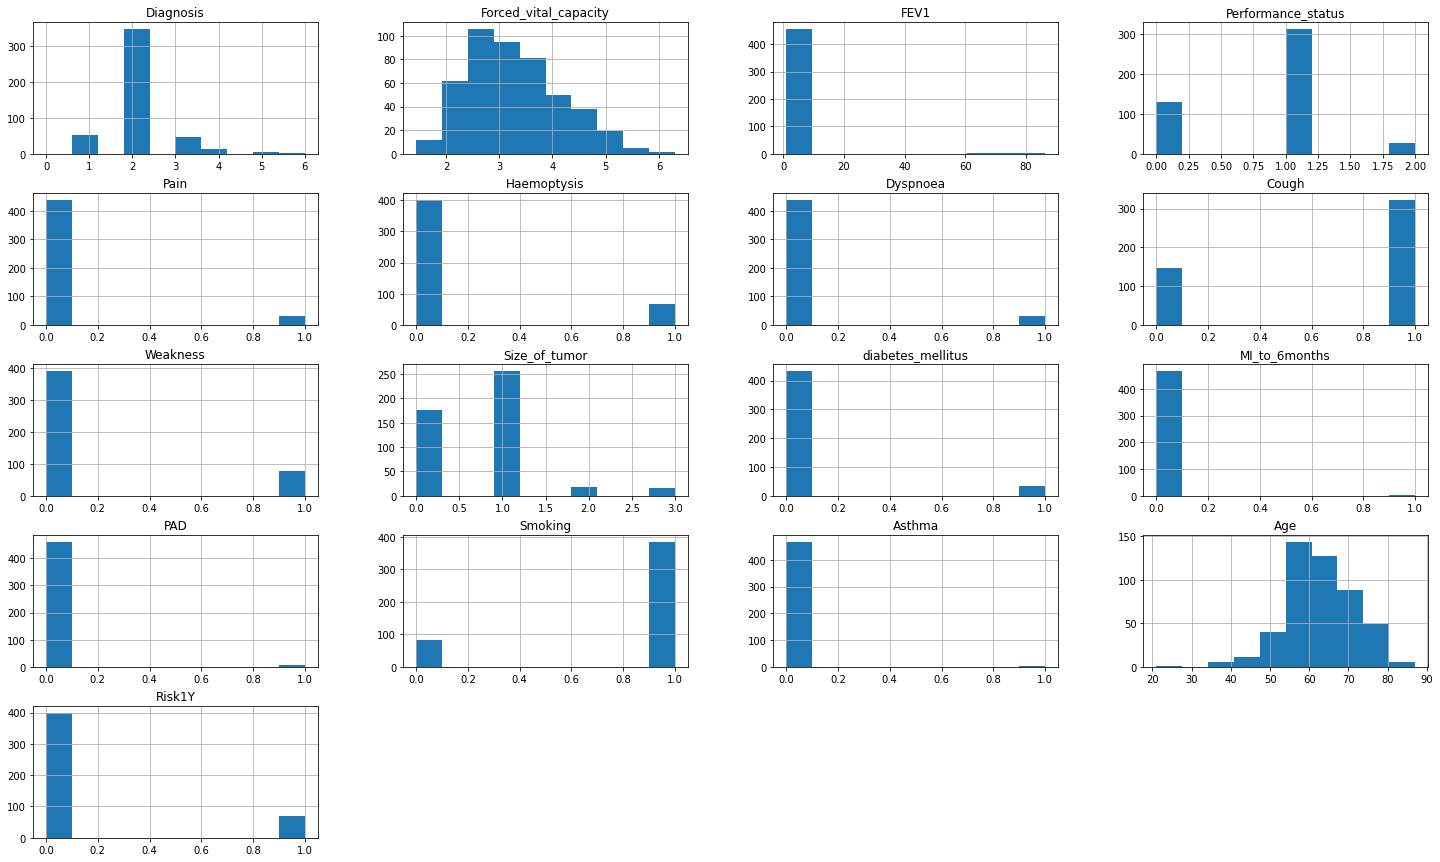

In [10]:
Dataset.hist(figsize= (25,15))
plt.show()

Практически все значения плохо сбалансированы. Возможно, имеет смысл использовать oversamling и добавить в датасет значений меньших классов, так как помимо несбалансированности наш датасет отличается малым количеством наблюдений. Но перед тем, как изменить датасет, посмотрим, как с ним справится алгоритм в текущем состоянии. В следующей ячейке я проверю распределение целевых классов в цифрах.

2    349
1     52
3     47
4     15
5      4
6      2
0      1
Name: Diagnosis, dtype: int64 



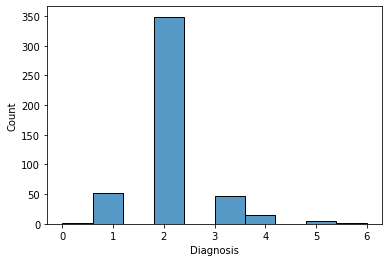

In [11]:
print(Dataset.Diagnosis.value_counts(), '\n')
sns.histplot(data = Dataset.Diagnosis)

С классами 0, 6 и 5 всё совсем плохо, их модель не сможет распознать.

У класса 4 тоже очень мало наблюдений. 

Класс 2 содержит около 75% всех случаев.

Классы 1 и 3 на порядок больше классов 4,5,6,0, и на порядок меньше класса 2.

Далее я возьму срезы по минорным классам, чтобы визуально оценить, имеются ли у них какие-то особенности.

In [12]:
Dataset[Dataset.Diagnosis == 0]

,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
292,0,3.8,2.8,0,0,0,0,0,0,1,0,0,0,1,0,62,0


In [13]:
Dataset[Dataset.Diagnosis == 4]

,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
25,4,4.56,72.80,0,1,1,0,1,0,1,0,0,0,1,0,57,0
32,4,2.48,1.95,1,1,0,0,0,0,1,1,0,0,0,0,72,0
40,4,3.80,2.98,1,0,0,0,1,0,0,0,0,0,1,0,60,1
43,4,2.68,2.12,0,0,0,0,1,0,1,0,0,0,1,0,51,1
88,4,2.68,1.76,2,0,1,0,1,1,0,0,0,0,1,0,76,0
105,4,4.95,4.12,1,0,0,0,0,1,0,0,0,0,0,0,57,0
185,4,3.52,2.56,0,0,0,1,0,0,1,0,0,0,0,0,81,1
220,4,2.87,2.08,1,0,0,0,1,0,2,0,0,0,1,0,56,1
231,4,2.88,2.52,1,0,0,0,1,0,1,0,0,0,1,0,56,0
238,4,3.40,2.08,1,0,0,0,0,1,0,0,0,0,1,0,55,1


In [14]:
Dataset[Dataset.Diagnosis == 5]

,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
29,5,3.96,3.28,0,0,0,0,0,0,0,0,0,0,1,0,61,0
97,5,3.04,2.40,2,0,0,0,1,0,0,0,0,0,1,0,76,0
368,5,3.88,2.72,1,0,0,0,1,0,1,0,0,0,1,0,77,0
405,5,5.36,3.96,1,0,0,0,1,0,1,0,0,0,0,0,62,0


In [15]:
Dataset[Dataset.Diagnosis == 6]

,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
24,6,4.32,3.2,0,0,0,0,0,0,0,0,0,0,0,0,58,1
446,6,5.20,4.1,0,0,0,0,0,0,1,0,0,0,0,0,49,0


Визуально найти особенности не удалось. Разве что, в классе 4 имеются два аномально высоких значения параметра FEV1, что вполне может быть ошибкой в данных.

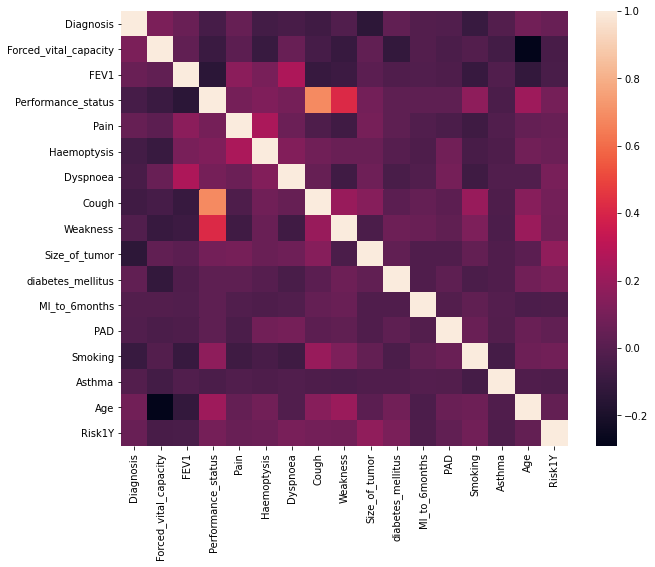

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(Dataset.corr())
plt.show()

Видно некоторую корреляцию у состояния пациента и наблюдаемым у него перед операцией симптомам в виде кашля и слабости. 

Отрицательная корреляция выявлена между тестом FVC (Forced vital capacity) с возрастом пациента. FVC - это тест, в котором пациент выдыхает максимально возможное количество воздуха после максимально глубокого вдоха.

##Создание алгоритмов и их тестирование

Прежде всего, выделим наш целевой признак в отдельную переменную 

In [17]:
X = Dataset.drop(columns='Diagnosis')
y = Dataset.Diagnosis

Разделим их на тренировочную и тестовую выборки, используя специальный для этого метод из библиотеки sklearn

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)

Далее попробуем построить простую модель, например kNN, и посмотрим на её результативность.

### kNN

Импортируем нужные для алгоритма kNN методы из библиотеки sklearn

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Инициализируем функцию для отрисовки графика результативности модели в зависимости от подставляемого параметра k соседей

In [20]:
def grid_plot(x, y, title, y_label = 'accuracy', x_label = 'n_neighbors'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


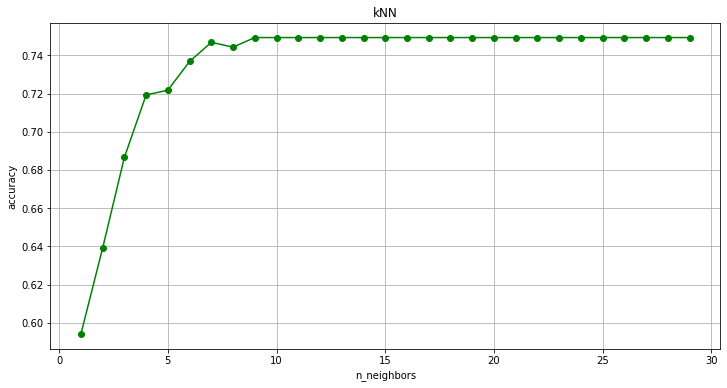

In [21]:
knn = KNeighborsClassifier()
knn_search = GridSearchCV(knn, {'n_neighbors': np.arange(1,30)}, cv=4)
knn_search.fit(X_train, y_train)
grid_plot(np.arange(1,30), knn_search.cv_results_['mean_test_score'],'kNN')

Мы видим, что в значениях n_neighbors после 9 линия становится прямой, то есть увеличивающееся количество соседей не влияет на точность модели дальше значения 9. Теперь используем этот параметр для получения предсказаний на тестовой выборке. Я вызову метод predict от обученного GridSearchCV, так как этот метод использует по умолчанию наилучший найденный параметр.

In [22]:
from sklearn.metrics import classification_report
knn_test_predictions = knn_search.predict(X_test)
print(classification_report(y_test,knn_test_predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.70      1.00      0.83        50
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4

    accuracy                           0.70        71
   macro avg       0.18      0.25      0.21        71
weighted avg       0.50      0.70      0.58        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Мы видим, что модель не может определить ни один класс, кроме мажорного. Это безусловно связано с несбалансированностью данных, а именно очень малым количеством наблюдений остальных классов в датасете. Дальше в ноутбуке мы снова опробуем этот алгоритм после балансировки классов, а пока посмотрим на работу другого алгоритма - логистической регрессии.

### Logistic regression

Импортируем алгоритм Логистической регрессии из библиотеки sklearn

In [23]:
from sklearn.linear_model import LogisticRegression

С помощью GridSearchCV, который уже был использован в алгоритме kNN я попробую подобрать наиболее подходящие параметры алгоритма

In [24]:
LR_search = GridSearchCV(LogisticRegression(solver='liblinear'), {'C': np.linspace(1,50,100), 'penalty': ['l1','l2']})
LR_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 1.        ,  1.494949...
       38.12121212, 38.61616162, 39.11111111, 39.60606061, 40.1010101 ,
       40.5959596 , 41.09090909, 41.58585859, 42.08080808, 42.57575758,
       43.07070707, 43.56565657, 44.06060606, 44.55555556, 45.05050505,
       45.54545455, 46.04040404, 46.53535354, 47.03030303, 47.5252

In [25]:
print(LR_search.best_params_, LR_search.best_score_)

{'C': 1.0, 'penalty': 'l1'} 0.7468354430379747


Мы видим, что наиболее подходящие параметры 'C'=1 и 'penalty'='l1'. Теперь имплементируем алгоритм. Я изменил значение параметра solver на 'liblinear', потому что данное значение рекомендовано для небольших датасетов.

In [26]:
LR = LogisticRegression(solver='liblinear', penalty='l1')
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Посмотрим на результат работы алгоритма. Используем метрики алгоритма регрессии $R^2 score$ и MAE.

In [27]:
from sklearn.metrics import mean_absolute_error, r2_score
LR_predictions = LR.predict(X_test)
print(" MAE score:", mean_absolute_error(y_test, LR_predictions), 
      '\n',
      "R2 score:", r2_score(y_test,LR_predictions))

 MAE score: 0.352112676056338 
 R2 score: -0.02136006974716631


Как и в случае с kNN, результаты совершенно никуда не годятся. Перепроверим на на функции classification_report

In [28]:
print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.70      1.00      0.83        50
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4

    accuracy                           0.70        71
   macro avg       0.18      0.25      0.21        71
weighted avg       0.50      0.70      0.58        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Результат аналогичен kNN. Минорные классы также игнорируются

### Naive Bayes

Посмотрим теперь, как с этими данными справится другой алгоритм классификации - Naive Bayes. Из разных вариантов этого алгоритма я выберу CategoricalNB, так как большая часть наших признаков категориальные.

#### Categoriical NB

In [29]:
from sklearn.naive_bayes import CategoricalNB

In [30]:
Categorical_bayes = CategoricalNB()
Categorical_bayes.fit(X_train,y_train)
CatNB_predictions = Categorical_bayes.predict(X_test)

In [31]:
print(classification_report(y_test, Categorical_bayes.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.11      0.20         9
           2       0.72      0.98      0.83        50
           3       0.50      0.12      0.20         8
           4       0.00      0.00      0.00         4

    accuracy                           0.72        71
   macro avg       0.56      0.30      0.31        71
weighted avg       0.69      0.72      0.63        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


В отличии от kNN наивный Байесовский классификатор смог отличить несколько экземпляров минорного класса. Похоже, что он сработал немного лучше остальных алгоритмов.

Однако же, в библиотеке реализован не один Байесовский классификатор, попробуем посмотреть на результаты работы других. Следующий алгоритм - Complement Байесевский классификатор.



#### Complement NB

In [32]:
from sklearn.naive_bayes import ComplementNB
Comp_NB = ComplementNB()
Comp_NB.fit(X_train,y_train)
print(classification_report(y_test, Comp_NB.predict(X_test)))

              precision    recall  f1-score   support

           1       0.17      0.11      0.13         9
           2       0.73      0.82      0.77        50
           3       0.12      0.12      0.12         8
           4       0.00      0.00      0.00         4

    accuracy                           0.61        71
   macro avg       0.26      0.26      0.26        71
weighted avg       0.55      0.61      0.58        71



Результат похож на CategoriaclNB.

### Decision Tree

Другая разновидность простых алгоритмов классификации - дерево решений. Посмотрим на результат

In [33]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
Tree_predictions = Tree.predict(X_test)
print(classification_report(y_test, Tree_predictions))

              precision    recall  f1-score   support

           1       0.12      0.11      0.12         9
           2       0.73      0.70      0.71        50
           3       0.08      0.12      0.10         8
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         0

    accuracy                           0.52        71
   macro avg       0.19      0.19      0.19        71
weighted avg       0.54      0.52      0.53        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Результат очень слабый, но нехуже предыдущих алгоритмамов.

Теперь используем сложный алгоритм классификации - градиентный бустинг.


### CatBoost Classifier

Библиотека CatBoost не предустановлена по умолчанию, нам нужно будет использовать команду pip install

In [34]:
!pip install catboost

     |████████████████████████████████| 65.8MB 58kB/s 


Теперь импортируем библиотеку catboost

In [35]:
import catboost

Обучаем наш алгоритм градиентного бустинга

In [36]:
Kitty = catboost.CatBoostClassifier()
Kitty.fit(X_train, y_train)

Learning rate set to 0.075505
0:	learn: 1.7668230	total: 56.5ms	remaining: 56.5s
1:	learn: 1.6551084	total: 64.4ms	remaining: 32.1s
2:	learn: 1.5567497	total: 71.2ms	remaining: 23.7s
3:	learn: 1.4789199	total: 77.2ms	remaining: 19.2s
4:	learn: 1.3927503	total: 78.6ms	remaining: 15.6s
5:	learn: 1.3226767	total: 79.9ms	remaining: 13.2s
6:	learn: 1.2758496	total: 86ms	remaining: 12.2s
7:	learn: 1.2253967	total: 87.3ms	remaining: 10.8s
8:	learn: 1.1926781	total: 93.5ms	remaining: 10.3s
9:	learn: 1.1572298	total: 99.6ms	remaining: 9.86s
10:	learn: 1.1274021	total: 106ms	remaining: 9.54s
11:	learn: 1.1011148	total: 112ms	remaining: 9.25s
12:	learn: 1.0766208	total: 119ms	remaining: 9.01s
13:	learn: 1.0535853	total: 125ms	remaining: 8.8s
14:	learn: 1.0313320	total: 131ms	remaining: 8.61s
15:	learn: 1.0132679	total: 137ms	remaining: 8.44s
16:	learn: 0.9965197	total: 143ms	remaining: 8.29s
17:	learn: 0.9803065	total: 149ms	remaining: 8.15s
18:	learn: 0.9655135	total: 156ms	remaining: 8.05s
19:	

Посмотрим на результат

In [37]:
Kitty_predictions = Kitty.predict(X_test)
print(classification_report(y_test, Kitty_predictions))

              precision    recall  f1-score   support

           1       0.33      0.11      0.17         9
           2       0.70      0.90      0.79        50
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4

    accuracy                           0.65        71
   macro avg       0.26      0.25      0.24        71
weighted avg       0.54      0.65      0.58        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Видно, что результаты тоже довольно слабые в целом. Взглянем, в какой степени разные параметры влияют на алгоритм.

In [38]:
Kitty.get_feature_importance(data=None,
                             prettified=True,
                             thread_count=-1,
                             verbose=False)   

,Feature Id,Importances
0,Age,24.846012
1,Forced_vital_capacity,17.674956
2,FEV1,15.639927
3,Size_of_tumor,9.679090
4,Performance_status,6.835688
5,Risk1Y,6.795046
6,Cough,5.616124
7,Smoking,4.207003
8,Weakness,3.372591
9,Haemoptysis,2.552142


## Оверсэмплинг

Мы снова возвращаемся к нашему датасету. Используя алгоритмы в предыдущем разделе мы получили в большинстве случаев очень слабый результат, так как алгоритм не мог обучиться на выборке с невыраженными минорными классами. Сейчас мы используем метод оверсэмплинга SMOTE, чтобы облегчить задачу алгоритму. Мы увеличим количество наблюдений в целом и в частности наблюдений минорного класса.

In [39]:
from imblearn.over_sampling import SMOTENC

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Я выбрал не стандартный SMOTE, а SMOTENC (nominal & continious), так как он предназначен для работы как с числовыми признаками, так и с категориальными. Однако, категориальные данные нам необходимо использовать в исходном формате, чтобы при добавлении новых образцов метод SMOTENC не генерировал значения, похожие на 0,5 в столбцах, где оригинальный датасет принимает значения только 1 и 0. Поэтому начнём с нашего изначального датасета.

In [40]:
Raw_dataset.head()

,id,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


В этот раз помимо применения Оверсэмплинга, мы также почистим наши данные от выбросов.

Снова удалим столбец id - он не несёт информации


In [41]:
cut_raw_dataset = Raw_dataset.drop(columns='id')
cut_raw_dataset.head()

,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


В графике распределений мы видели, что в столбце FEV1 есть аномально высокие значения. Мы избавимся от них, чтобы получить более нормальное распределение. Проверим, какие строки содержат аномальные значения (выберем больше 5) и сразу же отсортируем их.

In [42]:
cut_raw_dataset.FEV1[cut_raw_dataset.FEV1>5].sort_values()

73      5.48
215     8.56
353    52.30
444    60.90
112    64.10
89     66.40
98     67.30
319    69.10
132    71.10
25     72.80
352    73.30
330    76.00
438    76.80
255    78.30
325    79.30
349    86.30
Name: FEV1, dtype: float64

Теперь посмотрим на значения этой строки - действительно ли это выброс?

In [43]:
cut_raw_dataset.iloc[73]

Diagnosis                DGN4
Forced_vital_capacity     6.3
FEV1                     5.48
Performance_status       PRZ0
Pain                        F
Haemoptysis                 F
Dyspnoea                    F
Cough                       F
Weakness                    F
Size_of_tumor            OC11
diabetes_mellitus           F
MI_to_6months               F
PAD                         F
Smoking                     F
Asthma                      F
Age                        45
Risk1Y                      F
Name: 73, dtype: object

Похоже, что данное значение выбросом не является - значение Forced_vital_capacity тоже является относительно высоким. А возраст (Age), который тоже ниже большей части пациентов, даёт основание полагать, что результаты могут быть такими, какие указаны.

Теперь взглянем на следующего по списку, со значением FEV1 - 8.56

In [44]:
cut_raw_dataset.iloc[215]

Diagnosis                DGN2
Forced_vital_capacity    2.66
FEV1                     8.56
Performance_status       PRZ1
Pain                        F
Haemoptysis                 T
Dyspnoea                    F
Cough                       T
Weakness                    F
Size_of_tumor            OC12
diabetes_mellitus           F
MI_to_6months               F
PAD                         F
Smoking                     T
Asthma                      F
Age                        61
Risk1Y                      F
Name: 215, dtype: object

Здесь уже похоже на выброс. Лучше всего эту строку будет удалить, так как данные могут быть некорректны. Соответственно, все строки со значениями выше этого мы тоже удалим.

In [45]:
cut_raw_dataset = cut_raw_dataset.drop(cut_raw_dataset[cut_raw_dataset.FEV1>6].index)

От аномальных значений избавились, теперь займёмся целевой переменной. Посмотрим ещё раз на количество экземпляров классов

In [46]:
cut_raw_dataset.Diagnosis.value_counts()

DGN3    341
DGN2     49
DGN4     45
DGN5     13
DGN6      4
DGN8      2
DGN1      1
Name: Diagnosis, dtype: int64

Ранее в этом ноутбуке мы смотрели на работу алгоритмов без изменений в классах, и ни один из алгоритмов не может распознать классы, экземпляров у которых очень мало. Искусственно создать на имеющихся данных тоже не получится. Поэтому три класса - DGN6, DGN8 и DGN1 мы попросту удалим и не будем их учитывать.

In [47]:
cut_raw_dataset = cut_raw_dataset.drop(cut_raw_dataset.loc[cut_raw_dataset.Diagnosis.isin(['DGN6', 'DGN8', 'DGN1'])].index)
cut_raw_dataset

,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


Теперь имплементируем алгоритм оверсэмплинга. Я применяю эту технику ко всему датасету, не разделяя его предварительно на тренировочную и тестовую часть. Причина опять же в очень малом количестве наблюдений.

Сперва разделим наш датасет на целевую переменную и набор признаков.

In [48]:
cut_raw_X = cut_raw_dataset.drop(columns='Diagnosis')
cut_raw_y = cut_raw_dataset.Diagnosis

In [49]:
cat_columns = ['Performance_status', 
              'Pain', 
              'Haemoptysis',
              'Dyspnoea',
              'Cough',
              'Weakness',
              'Size_of_tumor',
              'diabetes_mellitus',
              'MI_to_6months',
              'PAD',
              'Smoking',
              'Asthma',
              'Risk1Y']

In [50]:
SmoteNC = SMOTENC([cut_raw_X.columns.get_loc(col) for col in cat_columns])
Oversampled_X, Oversampled_y = SmoteNC.fit_resample(cut_raw_X, cut_raw_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Посмотрим на новый набор признаков

In [51]:
Oversampled_X = pd.DataFrame(Oversampled_X)
Oversampled_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,3.4,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,2.53129,1.97071,PRZ1,F,F,F,T,F,OC12,F,F,F,T,F,72,F
1360,4.95688,4.14753,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,60.441,T
1361,2.59087,1.84467,PRZ1,F,F,F,F,F,OC12,F,F,F,T,F,74.2174,F
1362,2.92755,2.13074,PRZ0,F,F,F,T,F,OC11,F,F,F,T,F,72,F


Имена столбцов сброшены - присвоим их заново.

Что касается столбца Age - видно, что алгоритм оверсэмплинга присвоил значения типа float, когда нам нужны целочисленные значения. Уберём все дроби из этого столбца.

In [52]:
Oversampled_X.columns=['Forced_vital_capacity', 
                       'FEV1', 
                       'Performance_status', 
                       'Pain', 
                       'Haemoptysis',
                       'Dyspnoea',
                       'Cough',
                       'Weakness',
                       'Size_of_tumor',
                       'diabetes_mellitus',
                       'MI_to_6months',
                       'PAD',
                       'Smoking',
                       'Asthma',
                       'Age',
                       'Risk1Y']

In [53]:
Oversampled_X.Age = Oversampled_X.Age//1

Теперь снова приведем значения False и True к 0 и 1 соответственно. Далее закодируем с помощью LabelEncoder остальные категориальные признаки.

In [54]:
Oversampled_X = Oversampled_X.replace({'F':0, 'T':1})

In [55]:
for categorical_column in ['Performance_status', 'Size_of_tumor']:
  Oversampled_X[categorical_column] = LabelEncoder().fit_transform(Oversampled_X[categorical_column])

In [56]:
Oversampled_y = LabelEncoder().fit_transform(Oversampled_y)
Oversampled_y

array([0, 1, 1, ..., 3, 3, 3])

In [57]:
Oversampled_X.describe()

,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,3.324206,2.548132,0.897361,0.019795,0.056452,0.018328,0.791789,0.075513,0.704545,0.024927,0.001466,0.005865,0.940616,0.001466,63.217009,0.192815
std,0.774552,0.721898,0.388415,0.139345,0.230876,0.134185,0.406178,0.264315,0.619997,0.155959,0.038278,0.076387,0.236429,0.038278,8.586950,0.394654
min,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,2.777531,2.044435,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.200000,2.405301,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.746850,2.880000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,70.000000,0.000000
max,6.300000,5.480000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


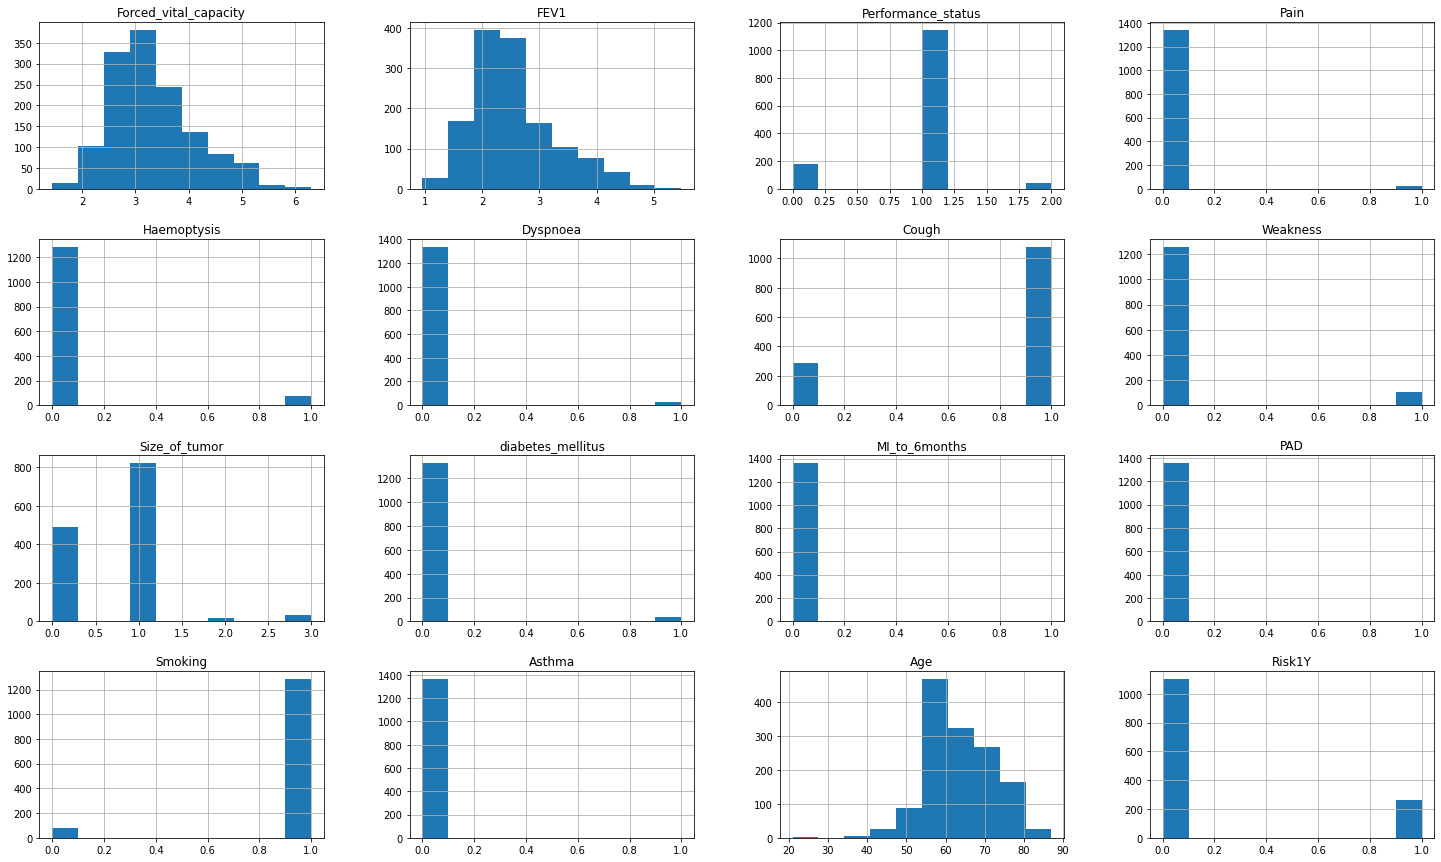

In [58]:
Oversampled_X.hist(figsize= (25,15))
plt.show()

На гистограммах видно, что распределение в столбце FEV1 похоже на нормальное, и больше не содержит выбросов. Некоторые столбцы, например Risk1Y, тоже стали более сбалансированными.

Теперь мы разделим данные на тренировочную и тестовую выборки из искусственно увеличенного датасета.

In [59]:
Train_oversampled_X, Test_oversampled_X, Train_oversampled_y, Test_oversampled_y = train_test_split(Oversampled_X, Oversampled_y)

### Повторное применение алгоритмов

#### kNN

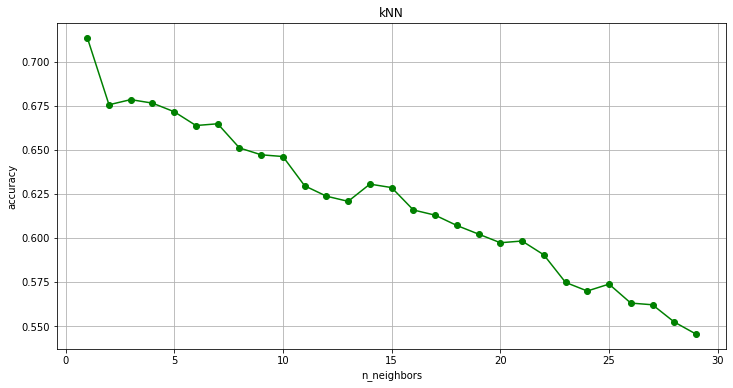

In [60]:
knn_search.fit(Train_oversampled_X, Train_oversampled_y)
grid_plot(np.arange(1,30), knn_search.cv_results_['mean_test_score'],'kNN')


In [61]:
knn_oversampled = KNeighborsClassifier(n_neighbors=3)
knn_oversampled.fit(Train_oversampled_X,Train_oversampled_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [62]:
print(classification_report(Test_oversampled_y,knn_oversampled.predict(Test_oversampled_X)))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        90
           1       0.63      0.34      0.44        77
           2       0.66      0.73      0.69        88
           3       0.79      0.95      0.86        86

    accuracy                           0.68       341
   macro avg       0.67      0.67      0.66       341
weighted avg       0.67      0.68      0.67       341



Диаграмма показывает, что при увеличении числа соседей точность алгоритма падает. Сам результат сложно назвать хорошим, но в отличии от работы на немодифицированных данных этот алгоритм различает с определённым успехом все выбранные классы

#### Logistic regression

In [63]:
LR_search.fit(Train_oversampled_X, Train_oversampled_y)
print(LR_search.best_params_, LR_search.best_score_)

{'C': 20.7979797979798, 'penalty': 'l1'} 0.5836202773792444


In [64]:
print(classification_report(Test_oversampled_y, LR_search.predict(Test_oversampled_X)))

              precision    recall  f1-score   support

           0       0.51      0.56      0.53        90
           1       0.56      0.55      0.55        77
           2       0.53      0.48      0.50        88
           3       0.75      0.76      0.75        86

    accuracy                           0.58       341
   macro avg       0.58      0.58      0.58       341
weighted avg       0.58      0.58      0.58       341



Опять видим способность различать классы, но общая точность оставляет желать лучшего

#### Naive Bayes

In [65]:
Categorical_bayes.fit(Train_oversampled_X,Train_oversampled_y)
print(classification_report(Test_oversampled_y,Categorical_bayes.predict(Test_oversampled_X)))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54        90
           1       0.58      0.55      0.56        77
           2       0.58      0.72      0.64        88
           3       0.75      0.67      0.71        86

    accuracy                           0.62       341
   macro avg       0.62      0.61      0.61       341
weighted avg       0.62      0.62      0.62       341



In [66]:
Comp_NB.fit(Train_oversampled_X,Train_oversampled_y)
print(classification_report(Test_oversampled_y, Comp_NB.predict(Test_oversampled_X)))

              precision    recall  f1-score   support

           0       0.45      0.58      0.50        90
           1       0.61      0.35      0.45        77
           2       0.42      0.40      0.41        88
           3       0.57      0.65      0.61        86

    accuracy                           0.50       341
   macro avg       0.51      0.49      0.49       341
weighted avg       0.51      0.50      0.49       341



Байесевские классификаторы не показали значительных улучшений в сравнении с другими алгоритмами

#### Decision Tree

In [67]:
Tree.fit(Train_oversampled_X, Train_oversampled_y)
Tree_predictions = Tree.predict(Test_oversampled_X)
print(classification_report(Test_oversampled_y, Tree_predictions))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69        90
           1       0.56      0.49      0.52        77
           2       0.69      0.80      0.74        88
           3       0.84      0.88      0.86        86

    accuracy                           0.71       341
   macro avg       0.70      0.71      0.70       341
weighted avg       0.71      0.71      0.71       341



А вот дерево решений в среднем показало значительное увелечение точности относительно предыдущих алгоритмов. 0,7 против 0,6 и менее

#### Catboost

In [68]:
Kitty.fit(Train_oversampled_X, Train_oversampled_y)
Kitty_predictions = Kitty.predict(Test_oversampled_X)


Learning rate set to 0.079219
0:	learn: 1.3339136	total: 7.04ms	remaining: 7.03s
1:	learn: 1.2908177	total: 13.1ms	remaining: 6.51s
2:	learn: 1.2457317	total: 18.7ms	remaining: 6.21s
3:	learn: 1.2136232	total: 24.9ms	remaining: 6.2s
4:	learn: 1.1693192	total: 31ms	remaining: 6.17s
5:	learn: 1.1410120	total: 37.8ms	remaining: 6.27s
6:	learn: 1.1106366	total: 43.3ms	remaining: 6.14s
7:	learn: 1.0942677	total: 49.4ms	remaining: 6.12s
8:	learn: 1.0735597	total: 55.6ms	remaining: 6.12s
9:	learn: 1.0575191	total: 60.9ms	remaining: 6.03s
10:	learn: 1.0428583	total: 66.4ms	remaining: 5.97s
11:	learn: 1.0217698	total: 71.6ms	remaining: 5.89s
12:	learn: 1.0034657	total: 77ms	remaining: 5.84s
13:	learn: 0.9958011	total: 82.5ms	remaining: 5.81s
14:	learn: 0.9794329	total: 91ms	remaining: 5.97s
15:	learn: 0.9662852	total: 96.4ms	remaining: 5.93s
16:	learn: 0.9511583	total: 102ms	remaining: 5.88s
17:	learn: 0.9377458	total: 107ms	remaining: 5.84s
18:	learn: 0.9288360	total: 112ms	remaining: 5.8s
19:

In [69]:
print(classification_report(Test_oversampled_y, Kitty_predictions))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        90
           1       0.71      0.61      0.66        77
           2       0.71      0.77      0.74        88
           3       0.86      0.88      0.87        86

    accuracy                           0.75       341
   macro avg       0.75      0.75      0.75       341
weighted avg       0.75      0.75      0.75       341



Градиентный бустинг показал самый значительный результат из всех опробованных алгоритмов. Конечно, этот результат можно усовершенствовать, но в рамках данного задания мы остановимся на этом.